---
# Analysis of cGenie AMOC Sensibility Experiments
---

**Author:** Amaury Laridon

**Date:** 27/11/2023

---
Three experiments have been perform by Justin Gérard for my Master's Thesis. The goal of those experiment is to produce the bifurcation diagram and to retrieve critical bifurcation coordinates on which I will calibrate my simplified model of the AMOC in the Tipping Cascade Module of the AMOC-GIS that I implement in SURFER. 

In the parameterization B of the fresh water flux the ODE model that encodes the dynamics of the AMOC in my tipping module is the following : 

$$      \frac{d\Psi}{dt} = (-\Psi^3 + a_1\Psi^2 + b_1\Psi + c_1 + d_1 T + e_{12}F_{GIS}+fF_O)\mu_\Psi(\Psi)  = h(\Psi, T, F_{GIS}, F_O) \quad (1)      $$

The goal from the experiments made with cGenie is to retrieve the coordinates,

$$  \left\{(\Psi^+, T^+), (\Psi^-, T^-), (\Psi^+, F_{GIS}^+), (\Psi^-, F_{GIS}^-), (\Psi^+, F_{O}^+), (\Psi^-, F_{O}^-)\right \} $$

The experiments are the following one :

- **ExpA = Bifurcation experiment with a $CO_2$ forcing** and constant freshwater forcing.
    - In our module we force the AMOC with a temperature forcing but we can find a relation to convert a forcing in $CO_2$ into a forcing in temperature. 
- **ExpB = Bifurcation experiment with a $F_{GIS}$ forcing** and constant $CO_2$ forcing and constant $F_{O}$ freshwater forcing.
    - Hosing experiment of $0.2 \; Sv$ injected between 50°N and 70°N and 45°W and 5°E with constant salinity over the global ocean.
- **ExpC = Bifurcation experiment with a $F_{O}$ forcing** and constant $COO_2$ forcing and constant $F_{O}$ freshwater forcing.

---


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image

Loading Data

In [26]:
### Personnal data path ###

personal_data_path_ExpA = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_CO2/biogem/"
personal_data_path_ExpB = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_freshwater_flux_0.2Sv_sal_cst/biogem/"
personal_data_path_ExpC = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/jgerard simulations/bifurcation_freshwater_flux_50_and_70_N_0.2Sv_sal_cst/biogem/"
save_fig_dir = "/home/amaury/Bureau/LPHYS2299 - Master's Thesis/Code/cGenie Simulations/Figures/"

##### Reading data #####

### Exp A ###

## CO2 Forcing ## 
forcing_CO_2 = pd.read_table(personal_data_path_ExpA+"biogem_series_atm_pCO2_mod.res",header=1,sep=",")
global_pCO2 = forcing_CO_2["0.279984E-03"]
year_ExpA = forcing_CO_2["0.500"]

## Temperature Forcing ## 
forcing_temp = pd.read_table(personal_data_path_ExpA+"biogem_series_atm_temp.res", header=1, sep=",")
global_sat = forcing_temp["12.268095"]

## Global and Atlantic Overturning Circulation ## 

opsi_ExpA = pd.read_table(personal_data_path_ExpA+"biogem_series_misc_opsi.res",header=1,sep=",")
glob_min_overt_ExpA = opsi_ExpA["-35.594"]
glob_max_overt_ExpA = opsi_ExpA["37.735"]
atl_min_overt_ExpA = opsi_ExpA["-0.566"]
atl_max_overt_ExpA = opsi_ExpA["14.398"]

### Exp B ###


### Exp C ###



## Output ## 

#print(forcing_temp)
#print(global_sat)
#print(forcing_CO_2)
#print(opsi_ExpA)

---
## ExpA - $CO_2$ Sensibility Experiment
---

### Time series of the forcing

#### $CO_2$ forcing

#TODO À Clarifier les unités de la concentration ici !

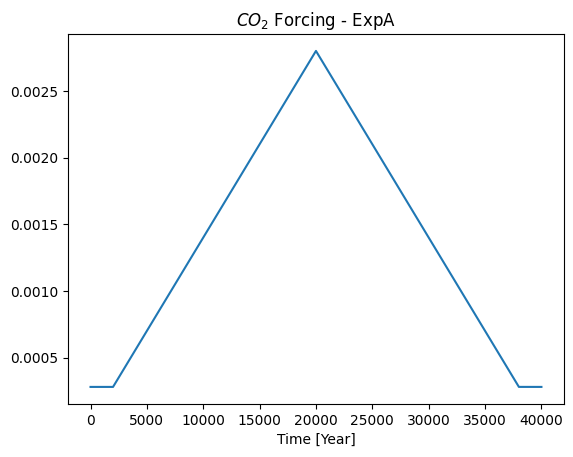

In [27]:
plt.plot(year_ExpA, global_pCO2)
plt.title(r"$CO_{2}$"+" Forcing - ExpA")
plt.xlabel("Time [Year]")
plt.savefig(save_fig_dir+'/EXPA/EXPA_CO2_forcing')
plt.show()

#### Temperature forcing

In [44]:
eq_temp_cGenie = global_sat[0]
global_sat_anomaly_cGenie = global_sat - eq_temp_cGenie
print(eq_temp_cGenie)

12.26731


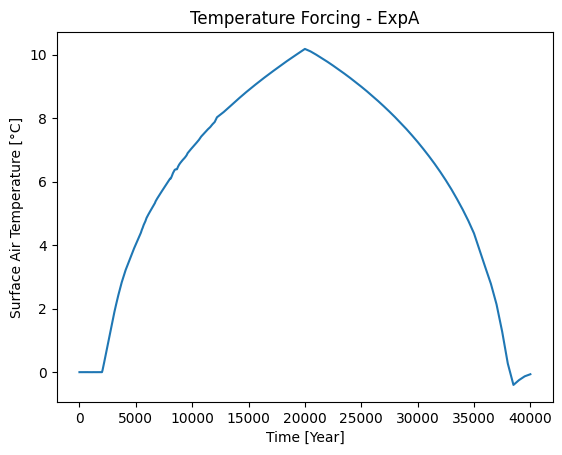

In [42]:
plt.plot(year_ExpA, global_sat_anomaly_cGenie)
plt.title("Temperature Forcing - ExpA")
plt.xlabel("Time [Year]")
plt.ylabel("Surface Air Temperature [°C]")
plt.savefig(save_fig_dir+'/EXPA/EXPA_Temp_forcing_anomaly')
plt.show()

### Data Analysis

#### Global Min/Max Overtuning Stream-Functions Values

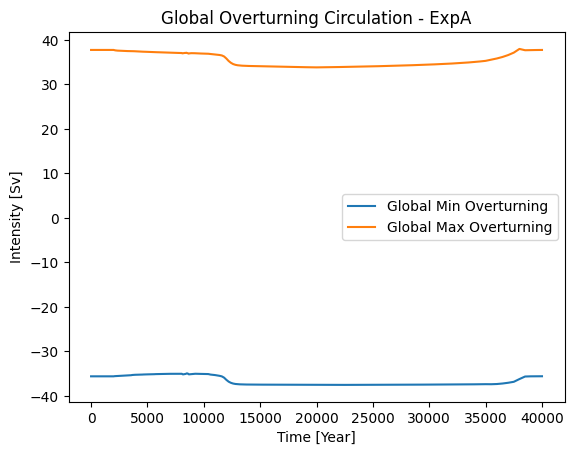

In [29]:
plt.plot(year_ExpA, glob_min_overt_ExpA,label='Global Min Overturning')
plt.plot(year_ExpA, glob_max_overt_ExpA,label='Global Max Overturning')
plt.title("Global Overturning Circulation - ExpA")
plt.xlabel("Time [Year]")
plt.ylabel("Intensity [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPA/EXPA_Glob_Overt_Circ_MinMax')
plt.show()

#### Global Min/Max Overtuning Atlantic Overturning circulation

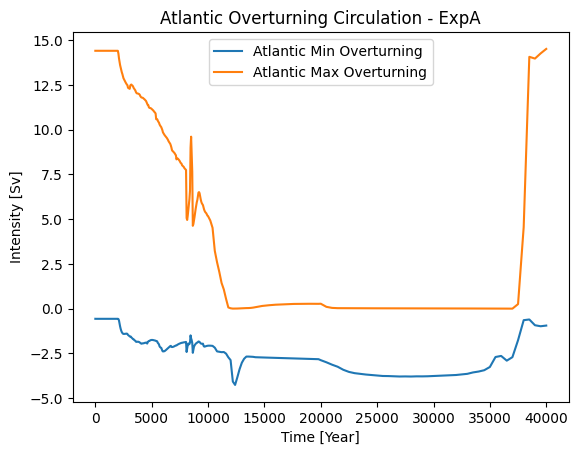

In [30]:
plt.plot(year_ExpA, atl_min_overt_ExpA,label='Atlantic Min Overturning')
plt.plot(year_ExpA, atl_max_overt_ExpA,label='Atlantic Max Overturning')
plt.title("Atlantic Overturning Circulation - ExpA")
plt.xlabel("Time [Year]")
plt.ylabel("Intensity [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPA/EXPA_Atl_Overt_Circ_MinMax')
plt.show()

#### Bifurcation Diagram

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


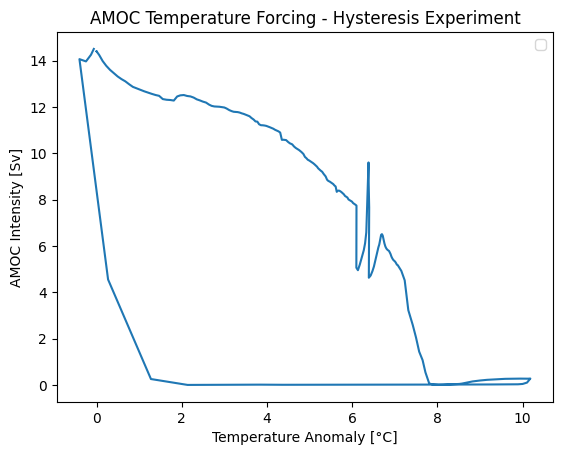

In [43]:
plt.plot(global_sat_anomaly_cGenie, atl_max_overt_ExpA)
plt.title("AMOC Temperature Forcing - Hysteresis Experiment")
plt.xlabel("Temperature Anomaly [°C]")
plt.ylabel("AMOC Intensity [Sv]")
plt.legend()
plt.savefig(save_fig_dir+'/EXPA/EXPA_bif_diag')
plt.show()

Now we have to answer to question, how to chose the critical bifurcation coordinates from this graph ? 

---
## ExpB - $F_{GIS}$ Sensibility Experiment
---

---
## ExpC - $F_{O}$ Sensibility Experiment
---